# Proyecto 2: Ingeniería de features, Modelos avanzados e Interpretación de modelos

Trabajaremos con el dataset de Properati, según indicado en la consigna:

1°- Importo las librerías necesarias para comenzar:

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2° - Importo el dataset de Properati:

In [3]:
data_properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data_properati.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


Aplico algunos filtros realizados en el Proyecto 01, para tener el mismo punto de partida:

In [4]:
data_properati = data_properati[(data_properati.property_type=="Departamento")
                |(data_properati.property_type=="PH")
                |(data_properati.property_type=="Casa")
                ]
data_properati = data_properati[data_properati.l2 == "Capital Federal"]

Visualizo y elimino algunos errores presentes en el dataset:

In [5]:
print(color.BLUE + 'Propiedades con mayor cantidad de habitaciones que ambientes' + color.END)
data_properati.query('rooms < bedrooms')

Propiedades con mayor cantidad de habitaciones que ambientes


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
5883,2019-04-12,2019-10-10,2019-04-12,-34.626409,-58.509071,Argentina,Capital Federal,Villa Luro,1.0,4.0,1.0,38.0,38.0,80800.0,USD,"2 ambientes, oportunidad de inversión desde pozo",Corredor Responsable: GABRIELA FERNANDEZ - CPI...,Departamento,Venta
8843,2019-11-03,2019-12-23,2019-11-03,-34.630209,-58.364202,Argentina,Capital Federal,Boca,2.0,15.0,1.0,47.0,44.0,100000.0,USD,EXCELENTE 2 AMBIENTES CON BALCON AL FRENTE,2 AMB. AL FRENTE CON CÓMODO BALCÓN VISTA ...,Departamento,Venta
11253,2019-03-08,2019-07-25,2019-03-08,-34.551626,-58.472731,Argentina,Capital Federal,Saavedra,5.0,6.0,3.0,263.0,163.0,290000.0,USD,AMPLIO PH / VARIOS DESTINOS,<br>Sobre Av. Crmer al 3600 entre Av. Larralde...,PH,Venta
13331,2019-08-05,2019-08-17,2019-08-05,-34.620905,-58.398290,Argentina,Capital Federal,San Cristobal,7.0,13.0,8.0,874.0,605.0,700000.0,USD,Encantador PH Restaurado con terraza! Oportunidad,Corredor Responsable: Ariel Champanier - CUCIC...,PH,Venta
14242,2019-05-29,9999-12-31,2019-05-29,NaN,NaN,Argentina,Capital Federal,Once,1.0,2.0,1.0,56.0,56.0,117000.0,USD,Dto semip Balvanera 3amb 56m2 balc fte Saavedr...,NUEVO PRECIO - Departamento en Venta en Balvan...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113815,2019-10-12,2019-12-23,2019-10-12,-34.595355,-58.379684,Argentina,Capital Federal,Retiro,1.0,2.0,1.0,45.0,45.0,73000.0,USD,Negociable. Venta. Departamento. 45 m². Suipac...,CARACTERÍSTICAS- Superficie total: 45 m².- Mon...,Departamento,Venta
123288,2019-06-01,2019-12-01,2019-06-01,-34.594806,-58.374352,Argentina,Capital Federal,Retiro,4.0,5.0,2.0,179.0,172.0,460000.0,USD,Piso 4 ambientes con dependencia en retiro.,Corredor Responsable: ELEONORA MEDEOT MINUJEN ...,Departamento,Venta
129923,2019-10-24,9999-12-31,2019-10-24,-34.601983,-58.468209,Argentina,Capital Federal,Paternal,4.0,9.0,4.0,283.0,170.0,240000.0,USD,PH VENTA / IDEAL INVERSOR / IDEAL MULTIFAMILIA !!,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta
131446,2019-10-08,2019-10-24,2019-10-08,-34.601983,-58.468209,Argentina,Capital Federal,Paternal,4.0,9.0,4.0,283.0,170.0,240000.0,USD,PH VENTA / IDEAL INVERSOR / IDEAL MULTIFAMILIA !!,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta


In [6]:
print(color.BLUE + 'Propiedades con superficie cubierta mayor a total' + color.END)
data_properati.query('surface_covered > surface_total')

Propiedades con superficie cubierta mayor a total


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
446,2019-03-04,2019-08-17,2019-03-04,-34.613369,-58.488637,Argentina,Capital Federal,Villa Santa Rita,5.0,4.0,3.0,230.0,244.0,490000.0,USD,VENTA CASA 5 AMBIENTES,Corredor Responsable: Mónica Silvia Martinuzzi...,Casa,Venta
859,2019-04-25,2019-05-21,2019-04-25,-34.561805,-58.459579,Argentina,Capital Federal,Belgrano,3.0,2.0,1.0,43.0,44.0,133000.0,USD,Departamento 3 ambientes.Belgrano,Corredor Responsable: Gustavo Guastello - C.U....,Departamento,Venta
924,2019-04-25,9999-12-31,2019-04-25,-34.584201,-58.496345,Argentina,Capital Federal,Villa Pueyrredón,3.0,2.0,1.0,65.0,66.0,187000.0,USD,VENTA DEPTO 3 AMB VILLA PUEYRREDON CON COCHERA,Corredor Responsable: EMMA A. PIERSIMONI - CPI...,Departamento,Venta
1329,2019-07-08,2019-11-12,2019-07-08,-34.576322,-58.406275,Argentina,Capital Federal,Recoleta,2.0,1.0,2.0,44.0,45.0,235000.0,USD,DIVINO 2 AMB BAÑO Y TOIL RECICLADO POR ARQUITECTO,Corredor Responsable: KARINA QUINTEROS - CUCIC...,Departamento,Venta
1438,2019-07-08,2019-08-17,2019-07-08,-34.610787,-58.393919,Argentina,Capital Federal,Congreso,3.0,2.0,1.0,78.0,79.0,235000.0,USD,Venta dep-Congreso 3 amb-Restaurado-Impecable-,Corredor Responsable: Ariel Champanier - C.U.C...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145138,2020-01-15,2020-03-12,2020-01-15,-34.626300,-58.452418,Argentina,Capital Federal,Caballito,1.0,1.0,1.0,24.0,25.0,54900.0,USD,VENTA DEPTO MONOAMBIENTE- IDEAL INVERSOR-CABAL...,Corredor Responsable: Patricia Maria Sodor - C...,Departamento,Venta
145146,2020-01-15,2020-01-21,2020-01-15,-34.605086,-58.384630,Argentina,Capital Federal,San Nicolás,1.0,1.0,1.0,21.0,22.0,48000.0,USD,Monoambiente exc ubicación 1 cuadra obelisco,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta
145262,2020-01-15,9999-12-31,2020-01-15,-34.600988,-58.433062,Argentina,Capital Federal,Villa Crespo,3.0,2.0,1.0,51.0,52.0,127000.0,USD,Depto 3 ambientes.Muy buen estado. Villa crespo,Corredor Responsable: Patricia Maria Sodor - C...,Departamento,Venta
145376,2020-01-15,2020-02-05,2020-01-15,-34.650700,-58.385906,Argentina,Capital Federal,Barracas,6.0,4.0,2.0,197.0,290.0,329900.0,USD,CASA 6 AMBIENTES LOTE PROPIO BARRACAS,Corredor Responsable: GUILLERMO FRIMET - CUCIC...,Casa,Venta


Elimino los errores:

In [7]:
data_properati = data_properati.drop(data_properati[data_properati["surface_covered"]
                                                    >data_properati["surface_total"]].index)

data_properati = data_properati.drop(data_properati[data_properati["bedrooms"]
                                                    >data_properati["rooms"]].index)

data_properati.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


In [8]:
data_properati = data_properati[['rooms' , 'bedrooms' , 
                               'bathrooms' , 'surface_total' , 
                               'surface_covered' , 'price' , 'property_type' ,
                                'l3' , 'l2' , 'lat' , 'lon']]

In [9]:
data_properati.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,l3,l2,lat,lon
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,San Cristobal,Capital Federal,-34.605880,-58.384949
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Boedo,Capital Federal,-34.624056,-58.412110
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH,Palermo,Capital Federal,-34.593569,-58.427474
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH,Palermo,Capital Federal,-34.581294,-58.436754
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH,Villa Crespo,Capital Federal,-34.593779,-58.441239


### Parte A - Transformación de datos

A partir del conocimiento sobre la existencia de valores faltantes y outliers por el trabajo realizado en el proyecto anterior, aplicaré `Imputación de valores faltantes` y `Detección y eliminación de Outliers` con las nuevas herramientas adquiridas en el Bloque 2.

Evidencia de valores faltantes:

In [10]:
print(color.GREEN + 'Valores faltantes por columna' + color.END)
print(pd.isna(data_properati).sum())
print(data_properati.shape)

Valores faltantes por columna
rooms                 0
bedrooms              0
bathrooms          2163
surface_total      8916
surface_covered    9234
price                 0
property_type         0
l3                    0
l2                    0
lat                4519
lon                4533
dtype: int64
(90663, 11)


Podemos observar que las columnas con valores faltantes son columnas con datos relevantes para la estimación del precio de las propiedades, según lo trabajado en el Proyecto 1. Entonces, podemos observar que estas columnas con valores faltantes son:
* Lat
* Lon
* Bathrooms
* Surface total
* Surface covered

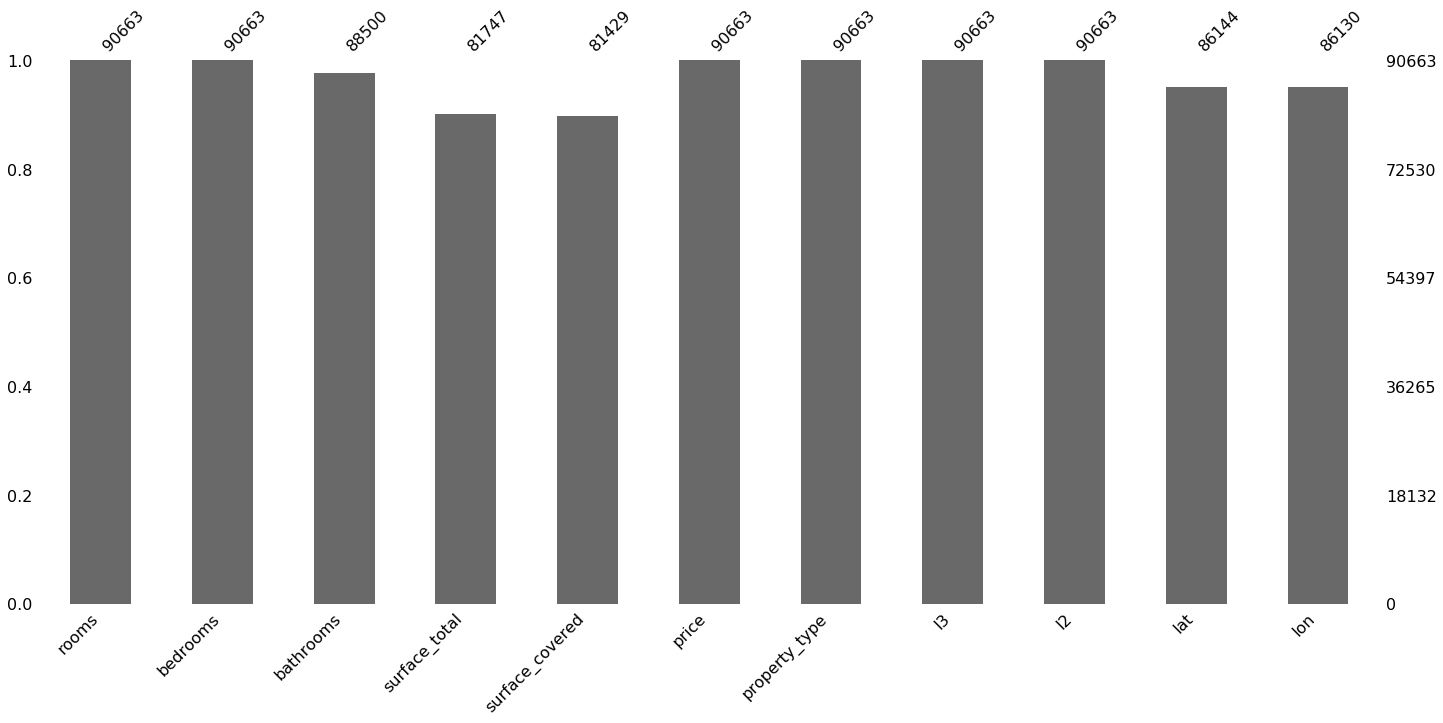

In [11]:
import missingno as msno
msno.bar(data_properati)

Con respecto a "Lat" y "Lon", procederé a visualizar en que zonas existen valores faltantes, para verificar si existe alguna razón

In [12]:
data_properati.loc[data_properati.isnull().any(axis=1)]

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,l3,l2,lat,lon
35,2.0,1.0,2.0,81.0,76.0,410000.0,Departamento,Palermo,Capital Federal,NaN,NaN
36,2.0,1.0,1.0,42.0,38.0,169000.0,Departamento,Palermo,Capital Federal,NaN,NaN
46,2.0,1.0,1.0,52.0,46.0,159500.0,Departamento,Palermo,Capital Federal,NaN,NaN
59,2.0,1.0,1.0,42.0,38.0,169000.0,Departamento,Palermo,Capital Federal,NaN,NaN
86,2.0,1.0,1.0,43.0,40.0,109000.0,Departamento,Balvanera,Capital Federal,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
146546,3.0,2.0,2.0,89.0,82.0,434999.0,Departamento,Palermo,Capital Federal,NaN,NaN
146547,3.0,2.0,2.0,82.0,82.0,585000.0,Departamento,Palermo,Capital Federal,NaN,NaN
146548,3.0,2.0,2.0,82.0,82.0,475000.0,Departamento,Palermo,Capital Federal,NaN,NaN
146550,5.0,2.0,2.0,114.0,95.0,298000.0,PH,Palermo,Capital Federal,NaN,NaN


In [13]:
null_data = data_properati[data_properati.isnull().any(axis=1)]
print(null_data)

        rooms  bedrooms  bathrooms  surface_total  surface_covered      price  \
35        2.0       1.0        2.0           81.0             76.0   410000.0   
36        2.0       1.0        1.0           42.0             38.0   169000.0   
46        2.0       1.0        1.0           52.0             46.0   159500.0   
59        2.0       1.0        1.0           42.0             38.0   169000.0   
86        2.0       1.0        1.0           43.0             40.0   109000.0   
...       ...       ...        ...            ...              ...        ...   
146546    3.0       2.0        2.0           89.0             82.0   434999.0   
146547    3.0       2.0        2.0           82.0             82.0   585000.0   
146548    3.0       2.0        2.0           82.0             82.0   475000.0   
146550    5.0       2.0        2.0          114.0             95.0   298000.0   
146558    4.0       3.0        5.0          220.0            210.0  1470000.0   

       property_type       

Text(0, 0.5, 'Cant. faltantes')

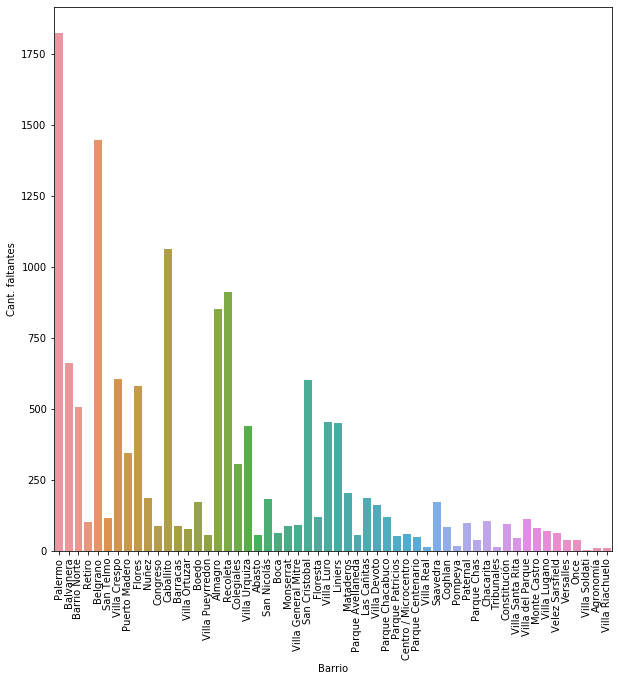

In [14]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'l3' , data = null_data)
plt.xticks(rotation = 90)
plt.xlabel('Barrio')
plt.ylabel('Cant. faltantes')

Podemos observar que los valores faltantes se concentran alrededor de aquellos barrios con inmuebles de mayor valor, razón por la cual infiero que los valores faltantes son `Missing Not At Random (MNAR)`.
La metodología elegida para tratar con los valores faltantes es eliminar aquellos datos que presenten problemas.

In [15]:
data_properati = data_properati.dropna()
print(pd.isna(data_properati).sum())
print(data_properati.shape)

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
l3                 0
l2                 0
lat                0
lon                0
dtype: int64
(76163, 11)


Proseguiré con la eliminación de Outliers. Primero presentaré boxplots de distintas variables para identificar la existencia de outliers.

Boxplots de superficie total y superficie cubierta


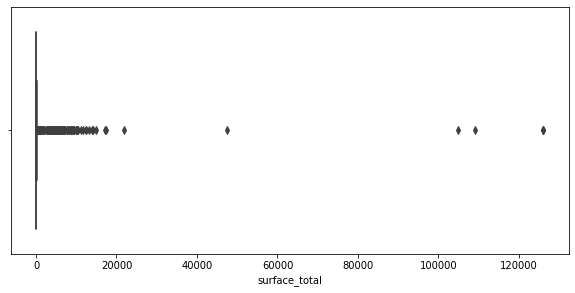

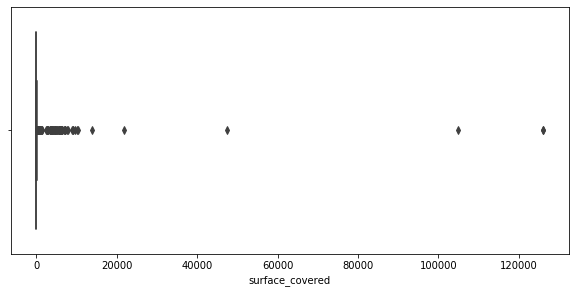

In [16]:
print(color.YELLOW + 'Boxplots de superficie total y superficie cubierta' + color.END)
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
sns.boxplot(x = 'surface_total', data = data_properati)
plt.figure(figsize = (10,10))
plt.subplot(2,1,2)
sns.boxplot(x = 'surface_covered', data = data_properati)

Boxplots de precio


<Figure size 720x720 with 0 Axes>

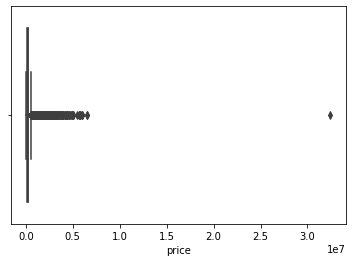

<Figure size 720x720 with 0 Axes>

In [17]:
print(color.GREEN + 'Boxplots de precio' + color.END)
sns.boxplot(x = 'price', data = data_properati)
plt.figure(figsize = (10,10))

Boxplots de ambientes


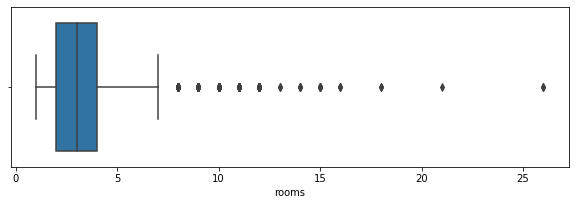

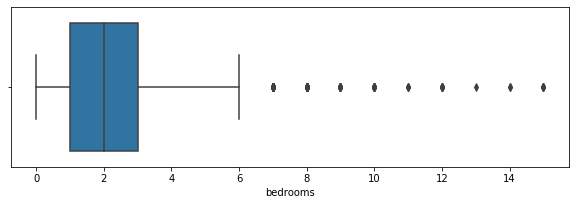

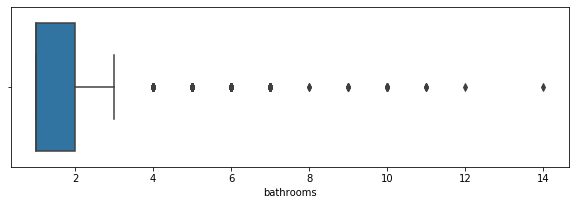

In [18]:
print(color.YELLOW + 'Boxplots de ambientes' + color.END)
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sns.boxplot(x = 'rooms', data = data_properati)
plt.figure(figsize = (10,10))
plt.subplot(3,1,2)
sns.boxplot(x = 'bedrooms', data = data_properati)
plt.figure(figsize = (10,10))
plt.subplot(3,1,3)
sns.boxplot(x = 'bathrooms', data = data_properati)

Efectivamente los boxplots nos muestran la existencia de outliers en las variables de referencia, por lo que a continuación procederé a eliminarlos mediante el criterio del `Rango intercuartílico`.

**Elimino outliers de superficie cubierta y total**

In [19]:
Q1 = data_properati['surface_total'].quantile(0.25)
Q3 = data_properati['surface_total'].quantile(0.75)
IQR = Q3 - Q1
data_properati = data_properati.drop(data_properati[data_properati['surface_total'] > Q3+1.5*IQR].index)

**Elimino outliers de precios**

In [20]:
Q1 = data_properati['price'].quantile(0.25)
Q3 = data_properati['price'].quantile(0.75)
IQR = Q3 - Q1
data_properati = data_properati.drop(data_properati[data_properati['price'] > Q3+1.5*IQR].index)

**Elimino outliers de ambientes**

In [21]:
Q1 = data_properati['rooms'].quantile(0.25)
Q3 = data_properati['rooms'].quantile(0.75)
IQR = Q3 - Q1
data_properati = data_properati.drop(data_properati[data_properati['rooms'] > Q3+1.5*IQR].index)

**Elimino outliers de habitaciones**

In [22]:
Q1 = data_properati['bedrooms'].quantile(0.25)
Q3 = data_properati['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
data_properati = data_properati.drop(data_properati[data_properati['bedrooms'] > Q3+1.5*IQR].index)

Dado que baños solamente presenta outliers superiores a Q3, no utilizaré el mismo método ya que de esa forma eliminaría la gran mayoría de los datos.
Los eliminaré de forma manual:

In [23]:
data_properati = data_properati.drop(data_properati[data_properati['bathrooms'] > 8].index)

Boxplots de superficie total y superficie cubierta


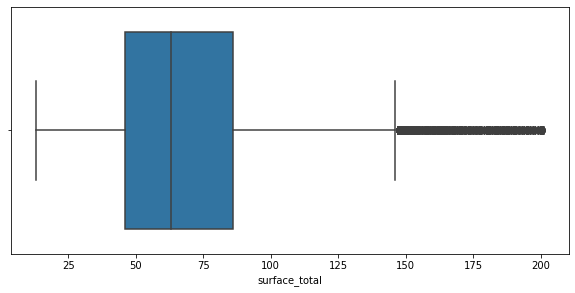

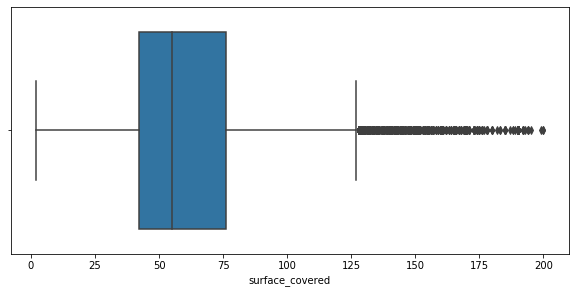

In [24]:
print(color.YELLOW + 'Boxplots de superficie total y superficie cubierta' + color.END)
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
sns.boxplot(x = 'surface_total', data = data_properati)
plt.figure(figsize = (10,10))
plt.subplot(2,1,2)
sns.boxplot(x = 'surface_covered', data = data_properati)

Boxplots de precio


<Figure size 720x720 with 0 Axes>

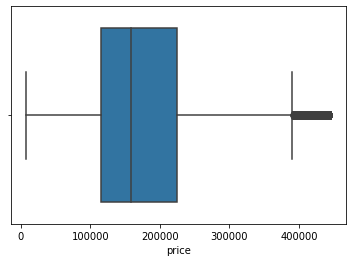

<Figure size 720x720 with 0 Axes>

In [25]:
print(color.GREEN + 'Boxplots de precio' + color.END)
sns.boxplot(x = 'price', data = data_properati)
plt.figure(figsize = (10,10))

Boxplots de ambientes


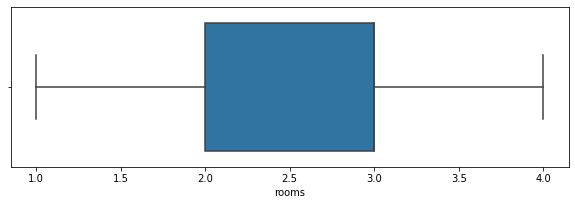

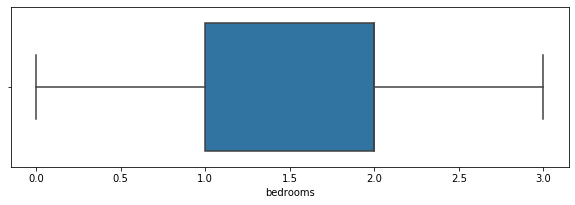

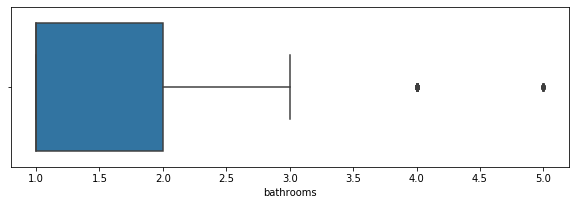

In [26]:
print(color.YELLOW + 'Boxplots de ambientes' + color.END)
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sns.boxplot(x = 'rooms', data = data_properati)
plt.figure(figsize = (10,10))
plt.subplot(3,1,2)
sns.boxplot(x = 'bedrooms', data = data_properati)
plt.figure(figsize = (10,10))
plt.subplot(3,1,3)
sns.boxplot(x = 'bathrooms', data = data_properati)

Procederé a continuación a realizar escalado de datos. El objetivo es estandarizar los datos contenidos en el dataset que tienen distintas unidades de medidas. Por ejemplo la cantidad de habitaciones o baños se cuenta por unidad y la superficie en m2.

Primero, importo la librería necesaría para utilizar la clase `StandardScaler` de Scikit-Learn:

In [27]:
from sklearn.preprocessing import StandardScaler

A continuación defino las variables X e y que serán utilizadas posteriormente en los modelos de ML: 

In [28]:
X = data_properati[['rooms' , 'bedrooms' , 'bathrooms' , 
                  'surface_total' , 'surface_covered' , 
                 'lat' , 'lon']]
y = data_properati.price

Realizo el reescalado de los datos:

In [29]:
scl = StandardScaler()
X = scl.fit_transform(X)

Ahora toca evaluar el desempeño de los datos en modelos de ML. Lo haré con un modelo de árboles de decisión y con uno de K vecinos más cercanos.

Realizo el "train_test_split":

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42 , 
                                                    stratify = data_properati.property_type)

Importo las librerías necesarias:

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Entreno el modelo de árboles de decisión:

In [32]:
properati_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
properati_tree.fit(X_train, y_train)
y_train_pred = properati_tree.predict(X_train)
y_test_pred = properati_tree.predict(X_test)

Cálculo y gráfico el RMSE obtenido:

Raíz del error cuadrático medio en Train: 43833.63210701749
Raíz del error cuadrático medio en Test: 44316.704649432075
R2 Score en Train: 0.7191958916525221
R2 Score en Test: 0.7163058244731527


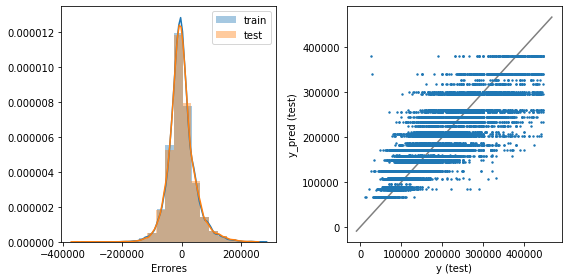

In [33]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print('R2 Score en Train:' , r2_train)  
print('R2 Score en Test:' , r2_test)

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred , bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred , bins = 20, label = 'test')
plt.xlabel('Errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test , y_test_pred , s =2)
    
lims = [
np.min([ax.get_xlim() , ax.get_ylim()]),  
np.max([ax.get_xlim() , ax.get_ylim()]),  
]
    
ax.plot(lims, lims, 'k-', alpha=0.5, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Se puede observar una mejora en el desempeño del modelo, en comparación al realizado con los mismo hiperparámetros en el Proyecto 1, a saber:
- RMSE Train Proyecto 1: 157056.39909474397
- RMSE Test Proyecto 1: 166565.76941660585

Ahora seguiré con el modelo de K vecinos más cercanos. Utilizaré los hiperparámetros definidos en el último ML entrenado en el proyecto anterior.

In [34]:
properati_knn = KNeighborsRegressor(n_neighbors=8)
properati_knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [35]:
y_train_pred = properati_knn.predict(X_train)
y_test_pred = properati_knn.predict(X_test)

Raíz del error cuadrático medio en Train: 27742.129221273335
Raíz del error cuadrático medio en Test: 32199.927474604992
R2 Score en Train: 0.8875218611542524
R2 Score en Test: 0.8502298419291502


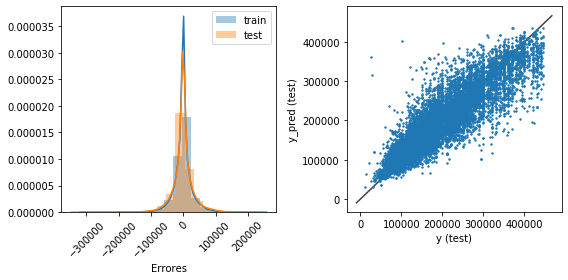

In [36]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print('R2 Score en Train:' , r2_train)  
print('R2 Score en Test:' , r2_test)
   
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('Errores')
plt.xticks(rotation = 45)
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  
np.max([ax.get_xlim(), ax.get_ylim()]),  
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

El RMSE obtenido nos permite observar una mejora respecto de lo obtenido anteriormente:
- RMSE en Train: 129824.2509794574
- RMSE en Test: 148350.41619468026

### Parte B - Modelos Avanzados

Los modelos avandos elegidos son:
- `RandomForest`
- `XGBoost`


In [37]:
X = data_properati[['rooms' , 'bedrooms' , 'bathrooms' , 
                  'surface_total' , 'surface_covered' , 
                 'lat' , 'lon']]
y = data_properati.price

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, 
                                                    stratify = data_properati.property_type)

## RandomForest

Importo las librerías necesarias:

In [39]:
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score

Defino el modelo y lo entreno:

In [40]:
rfr = RandomForestRegressor(n_estimators = 50, max_depth = 10 , n_jobs = -1 , oob_score = True, random_state = 42)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

A continuación realizo la predicción de "y" y calculo las métricas para evaluar el desempeño del modelo:

In [116]:
y_train_pred_rfr = rfr.predict(X_train)
y_test_pred_rfr = rfr.predict(X_test)
rfr_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rfr))
rfr_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_rfr))
print(f'Raíz del error cuadrático medio en Train: {rfr_rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rfr_rmse_test}')
rfr_r2_train = r2_score(y_train,y_train_pred_rfr)
rfr_r2_test = r2_score(y_test,y_test_pred_rfr)
print('R2 Score en Train:' , rfr_r2_train)  
print('R2 Score en Test:' , rfr_r2_test)

Raíz del error cuadrático medio en Train: 29532.431350971965
Raíz del error cuadrático medio en Test: 32326.332397088245
R2 Score en Train: 0.8725361749267183
R2 Score en Test: 0.8490516501702544


Se puede observar una mejora en cuanto a los resultados obtenidos en la primera sección con el modelo de Árboles de Decisión.
A continuación utilizaré `Random Search` para optimizar los hiperparámetros del modelo realizado:

#### Optimización de hiperparámetros a través de RandomizedSearchCV

In [42]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
params = {'max_depth': [10, 20, 30, 40, None],
          'n_estimators': [50, 60, 70, 80, 90],
         'max_features': ['auto' , 'sqrt'],
         'min_samples_leaf': [1, 2, 3],
         'min_samples_split': [2, 5, 10],
         'oob_score': [True, False]}

In [45]:
rfr2 = RandomizedSearchCV(rfr , params , cv=5 , random_state=42)

In [46]:
rfr2.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=10,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=50, n_jobs=-1,
                      

In [47]:
print("Mejores parametros: "+str(rfr2.best_params_))
print("Mejor Score: "+str(rfr2.best_score_)+'\n')

scores = pd.DataFrame(rfr2.cv_results_)
scores

Mejores parametros: {'oob_score': False, 'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
Mejor Score: 0.9005790686520478



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_oob_score,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.813771,1.094716,0.034388,0.001972,True,50,5,3,auto,10,"{'oob_score': True, 'n_estimators': 50, 'min_s...",0.831640,0.846375,0.849839,0.843082,0.847370,0.843661,0.006390,8
1,2.045065,0.100693,0.088827,0.005802,False,80,5,1,sqrt,None,"{'oob_score': False, 'n_estimators': 80, 'min_...",0.888858,0.897865,0.899091,0.897333,0.897827,0.896195,0.003714,3
2,2.398382,0.066727,0.047187,0.002993,False,50,10,2,auto,20,"{'oob_score': False, 'n_estimators': 50, 'min_...",0.883644,0.894861,0.894451,0.894304,0.893139,0.892080,0.004256,4
3,5.115105,0.107533,0.085546,0.003515,True,90,5,2,auto,40,"{'oob_score': True, 'n_estimators': 90, 'min_s...",0.891431,0.901603,0.901133,0.900647,0.899795,0.898922,0.003793,2
4,3.099010,0.020356,0.045176,0.001303,False,90,2,2,auto,10,"{'oob_score': False, 'n_estimators': 90, 'min_...",0.832452,0.847871,0.850473,0.845485,0.849679,0.845192,0.006597,6
5,2.667472,0.035731,0.057695,0.009251,False,50,5,1,auto,None,"{'oob_score': False, 'n_estimators': 50, 'min_...",0.893706,0.903426,0.902324,0.902807,0.900633,0.900579,0.003560,1
6,1.826865,0.007972,0.075554,0.003180,False,90,10,1,sqrt,20,"{'oob_score': False, 'n_estimators': 90, 'min_...",0.877957,0.889107,0.889611,0.886711,0.887785,0.886234,0.004261,5
7,0.938940,0.010785,0.028219,0.001010,True,50,10,1,sqrt,10,"{'oob_score': True, 'n_estimators': 50, 'min_s...",0.813227,0.827927,0.832038,0.825996,0.828327,0.825503,0.006442,10
8,2.342932,0.044247,0.035746,0.003788,True,60,5,3,auto,10,"{'oob_score': True, 'n_estimators': 60, 'min_s...",0.831808,0.846539,0.850057,0.843558,0.847929,0.843978,0.006441,7
9,3.062334,0.038328,0.041349,0.002229,True,80,10,3,auto,10,"{'oob_score': True, 'n_estimators': 80, 'min_s...",0.830589,0.846274,0.849386,0.843868,0.847786,0.843581,0.006745,9


In [48]:
#Mejores parametros: {'oob_score': False, 'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}

rfr3 = RandomForestRegressor(n_estimators = 50, max_depth = None , max_features = 'auto', 
                             n_jobs = -1 , oob_score = False, random_state = 42 ,
                            min_samples_split = 5, min_samples_leaf = 1)
rfr3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [117]:
y_train_pred_rfr3 = rfr3.predict(X_train)
y_test_pred_rfr3 = rfr3.predict(X_test)
#print(metrics.accuracy_score(y_train, y_train_pred))
#print(metrics.accuracy_score(y_test, y_test_pred))
rfr3_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rfr3))
rfr3_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_rfr3))
print(f'Raíz del error cuadrático medio en Train: {rfr3_rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rfr3_rmse_test}')
rfr3_r2_train = r2_score(y_train,y_train_pred_rfr3)
rfr3_r2_test = r2_score(y_test,y_test_pred_rfr3)
print('R2 Score en Train:' , rfr3_r2_train)  
print('R2 Score en Test:' , rfr3_r2_test)

Raíz del error cuadrático medio en Train: 12275.82832795628
Raíz del error cuadrático medio en Test: 25033.312648323328
R2 Score en Train: 0.9779763065377669
R2 Score en Test: 0.909478415356081


Valores obtenidos previo a la optimización:

- RMSE en Train: 29532.431350971965
- RMSE en Test: 32326.332397088245
- R2 Score en Train: 0.8725361749267183
- R2 Score en Test: 0.8490516501702544

Podemos observar una mejora en ambas métrica, tanto para Train como para Test.
Si bien puede existir un cierto Overfitting dada la diferencia entre el RMSE en Train y en Test, considero que el resultado obtenido es aceptable si tomamos en consideración los resultados obtenidos en la parte A, con modelos más sencillos y sin optimización.
A continuación un gráfico, para hacer más visual esta mejora:

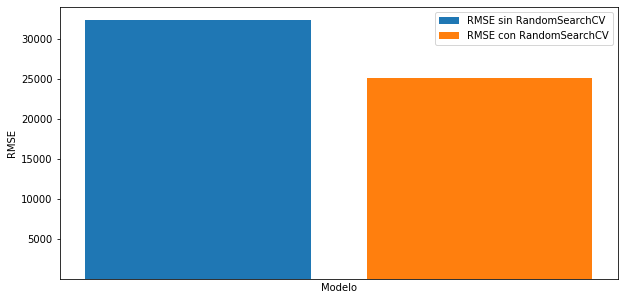

In [119]:
plt.figure(figsize=(10,5))
plt.bar(x = 0, height = rfr_rmse_test , label = 'RMSE sin RandomSearchCV' , bottom = 1)
plt.bar(x = 1, height = rfr3_rmse_test , label = 'RMSE con RandomSearchCV' , bottom = 1)
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Modelo')
plt.xticks([])
plt.show()

## XGBoost

In [77]:
import xgboost as xgb

In [78]:
xgb = xgb.XGBRegressor(random_state = 42)

In [79]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [80]:
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)


In [120]:
xgb_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
xgb_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
print(f'Raíz del error cuadrático medio en Train: {xgb_rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {xgb_rmse_test}')
xgb_r2_train = r2_score(y_train,y_train_pred_xgb)
xgb_r2_test = r2_score(y_test,y_test_pred_xgb)
print('R2 Score en Train:' , xgb_r2_train)  
print('R2 Score en Test:' , xgb_r2_test)

Raíz del error cuadrático medio en Train: 5285.518250590695
Raíz del error cuadrático medio en Test: 23786.25347021809
R2 Score en Train: 0.9959171474638153
R2 Score en Test: 0.9182726182163193


Podemos observar que los resultados de un primero modelo de XGBoost presentan un desempeño muy similar al del Random Forest con hiperparámetro optimizados.
A continuación realizaremos una validación cruzada y posteriormente la optimización de hiperparámetros.

#### Optimización de hiperparámetros a través de RandomizedSearchCV

In [82]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(xgb.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'objective': 'reg:squarederror',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}


In [83]:
params = {'n_estimators':[100, 150, 200, 250, 300, 350],
              'max_depth':np.arange(5,30),
         'learning_rate':[0.1 , 0.15, 0.2, 0.25, 0.3, 0.4],
         'min_child_weight':[1, 2, 3],
         'colsample_bytree': [0.8 , 0.9 , 1]}

In [84]:
xgb2 = RandomizedSearchCV(xgb, params, cv = 5, random_state = 42)

In [85]:
xgb2.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100,...
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1],
                                        'learning_rate': [0.1, 0.15, 0.2, 0.25,
                                   

In [86]:
print("Mejores parametros: "+str(xgb2.best_params_))
print("Mejor Score: "+str(xgb2.best_score_)+'\n')

scores = pd.DataFrame(xgb2.cv_results_)
scores

Mejores parametros: {'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 27, 'learning_rate': 0.15, 'colsample_bytree': 0.8}
Mejor Score: 0.9085347011705688



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.662980,0.167746,0.085578,0.001959,300,3,8,0.3,1,"{'n_estimators': 300, 'min_child_weight': 3, '...",0.889024,0.905300,0.899174,0.902344,0.900230,0.899214,0.005508,6
1,17.377326,0.312844,0.307121,0.018827,150,2,27,0.3,1,"{'n_estimators': 150, 'min_child_weight': 2, '...",0.890324,0.902084,0.899291,0.903358,0.897427,0.898497,0.004584,7
2,20.412532,0.056695,0.401625,0.019782,200,3,27,0.15,0.8,"{'n_estimators': 200, 'min_child_weight': 3, '...",0.902198,0.913653,0.908037,0.910461,0.908324,0.908535,0.003751,1
3,22.841790,0.053147,0.578704,0.019423,200,2,29,0.4,0.9,"{'n_estimators': 200, 'min_child_weight': 2, '...",0.887983,0.900499,0.892787,0.899191,0.893941,0.894880,0.004539,10
4,7.657538,0.095238,0.111167,0.004659,100,2,20,0.4,0.9,"{'n_estimators': 100, 'min_child_weight': 2, '...",0.888975,0.901167,0.893882,0.899783,0.897355,0.896232,0.004391,9
5,10.165372,0.160820,0.149172,0.001606,150,2,18,0.4,0.9,"{'n_estimators': 150, 'min_child_weight': 2, '...",0.889343,0.900823,0.894784,0.899635,0.898786,0.896675,0.004189,8
6,15.372340,0.060325,0.243140,0.019818,300,2,14,0.2,0.9,"{'n_estimators': 300, 'min_child_weight': 2, '...",0.898680,0.910410,0.906621,0.908981,0.907257,0.906390,0.004077,3
7,18.810398,0.149033,0.420746,0.034727,200,3,26,0.1,0.9,"{'n_estimators': 200, 'min_child_weight': 3, '...",0.901684,0.911930,0.908573,0.909521,0.907435,0.907829,0.003410,2
8,29.026486,0.665923,0.645435,0.067989,300,2,23,0.1,1,"{'n_estimators': 300, 'min_child_weight': 2, '...",0.896815,0.905520,0.904964,0.908835,0.905276,0.904282,0.003987,4
9,21.554047,0.187332,0.484264,0.011054,150,1,28,0.15,1,"{'n_estimators': 150, 'min_child_weight': 1, '...",0.895998,0.904454,0.903638,0.907060,0.901058,0.902442,0.003748,5


In [87]:
#Mejores parametros: {'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 27, 
#'learning_rate': 0.15, 'colsample_bytree': 0.8}

import xgboost as xgb
xgb3 = xgb.XGBRegressor(n_estimators = 200, max_depth = 27, learning_rate = 0.15, 
                        colsample_bytree = 0.8, min_child_weight = 3 , random_state = 42)

In [88]:
xgb3.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=27,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [121]:
y_train_pred_xgb3 = xgb3.predict(X_train)
y_test_pred_xgb3 = xgb3.predict(X_test)

In [122]:
xgb3_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb3))
xgb3_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb3))
print(f'Raíz del error cuadrático medio en Train: {xgb3_rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {xgb3_rmse_test}')
xgb3_r2_train = r2_score(y_train,y_train_pred_xgb3)
xgb3_r2_test = r2_score(y_test,y_test_pred_xgb3)
print('R2 Score en Train:' , r2_xgb3_train)  
print('R2 Score en Test:' , r2_xgb3_test)

Raíz del error cuadrático medio en Train: 5285.518250590695
Raíz del error cuadrático medio en Test: 23786.25347021809
R2 Score en Train: 0.9959171474638153
R2 Score en Test: 0.9182726182163193


Los resultados previos a la optimización fueron:

- RMSE en Train: 5285.518250590695
- RMSE en Test: 23786.25347021809
- R2 Score en Train: 0.9959171474638153
- R2 Score en Test: 0.9182726182163193

No se observa una mejora en el desempeño del modelo después de realizar RandomSearch.

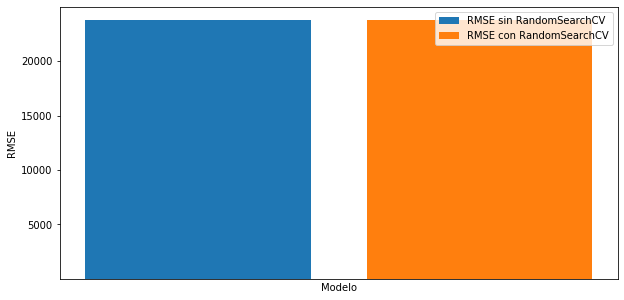

In [125]:
plt.figure(figsize=(10,5))
plt.bar(x = 0, height = xgb_rmse_test , label = 'RMSE sin RandomSearchCV' , bottom = 1)
plt.bar(x = 1, height = xgb3_rmse_test , label = 'RMSE con RandomSearchCV' , bottom = 1)
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Modelo')
plt.xticks([])
plt.show()

A continuación podemos plantear una comparación entre el mejor desempeño obtenido con `RandomForest` y el mejor desempeño obtenido con `XGBoost`

- RMSE en Train para RandomForest: 12275.82832795628
- RMSE en Train para XGBoost: 27742.129221273335


- RMSE en Test para RandomForest: 25033.312648323328
- RMSE en Test para XGBoost: 32199.927474604992


- R2 Score en Train para RandomForest: 0.9779763065377669
- R2 Score en Train para XGBoost: 0.9959171474638153


- R2 Score en Test para RandomForest: 0.909478415356081
- R2 Score en Test para XGBoost: 0.9182726182163193

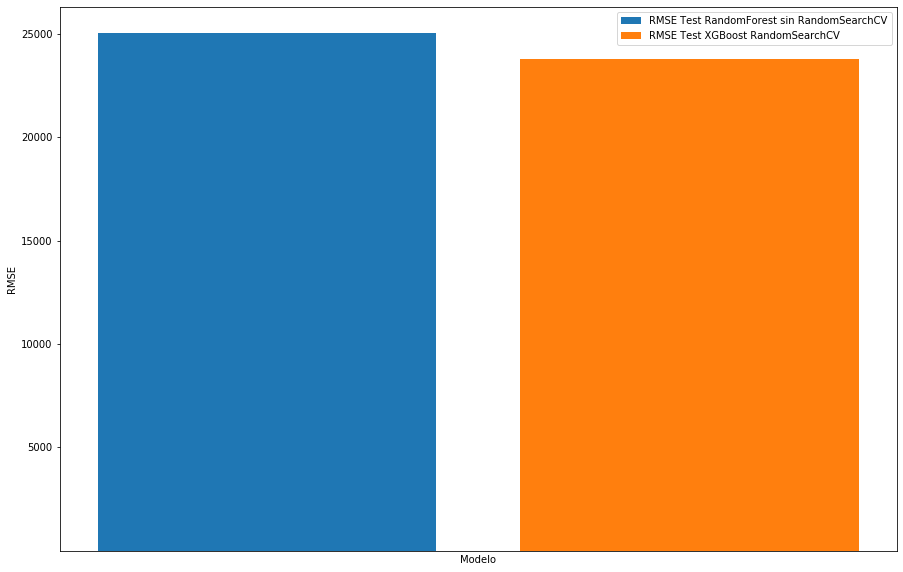

In [126]:
plt.figure(figsize=(15,10))
plt.bar(x = 0, height = rfr3_rmse_bar , label = 'RMSE Test RandomForest RandomSearchCV' , bottom = 1)
plt.bar(x = 1, height = xgb3_rmse_bar , label = 'RMSE Test XGBoost RandomSearchCV' , bottom = 1)
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Modelo')
plt.xticks([])
plt.show()

### Parte B - PARTE C - Interpretación de modelos

A continuación, mediante `feature_importance` trataré de identificar cuales fueron las variables más relevantes a la hora de predecir:

#### Feature importance en Random Forest:

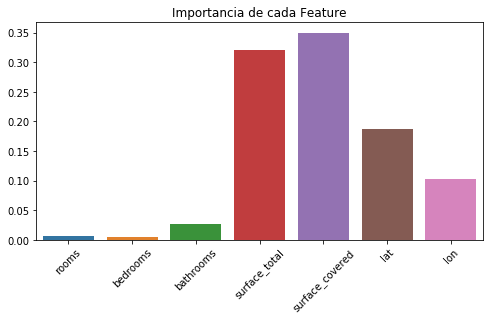

In [190]:
forest_important_variables = rfr3.feature_importances_
columns = X.columns
plt.figure(figsize = (8,4))
sns.barplot(columns, forest_important_variables)
plt.title('Importancia de cada Feature')
plt.xticks(rotation = 45)
plt.show()

#### Feature importance en XGBoost:

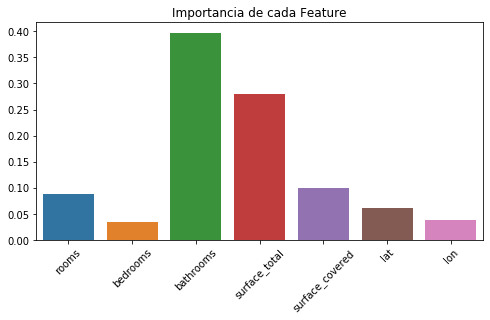

In [191]:
xgboost_important_variables = xgb3.feature_importances_
columns = X.columns
plt.figure(figsize = (8,4))
sns.barplot(columns, xgboost_important_variables)
plt.title('Importancia de cada Feature')
plt.xticks(rotation = 45)
plt.show()

#### Distribución de errores - XGBoost

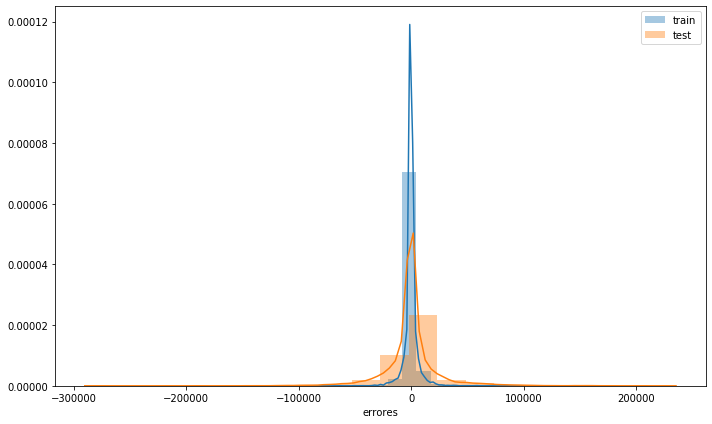

In [193]:
plt.figure(figsize = (10,6))
sns.distplot(y_train - y_train_pred_xgb3, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_xgb3, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()
plt.tight_layout()
plt.show()

#### Distribución de errores - RandomForest

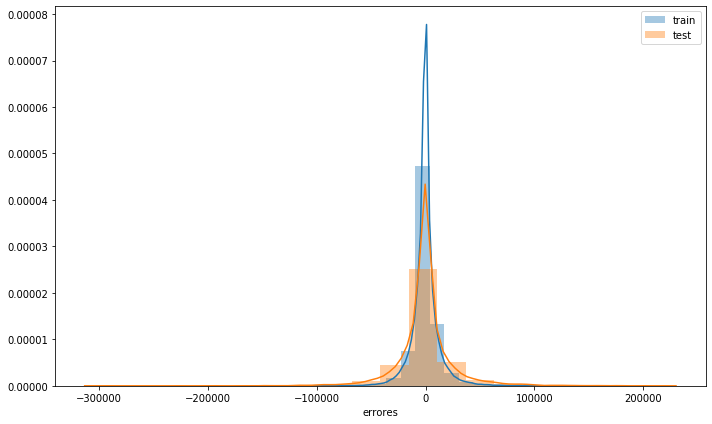

In [194]:
plt.figure(figsize = (10,6))
sns.distplot(y_train - y_train_pred_rfr3, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_rfr3, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()
plt.tight_layout()
plt.show()

In [195]:
Errores = {'Errores': y_test - y_test_pred_xgb3 , 'Propiedad': data_properati['property_type'] ,
           'Barrio': data_properati['l3']}
errores = pd.DataFrame(Errores)
errores

,Errores,Propiedad,Barrio
1,NaN,PH,Boedo
2,NaN,PH,Palermo
3,76384.203125,PH,Palermo
5,9996.312500,PH,Villa Crespo
6,NaN,PH,Villa Crespo
...,...,...,...
146543,NaN,Departamento,Palermo
146544,64742.406250,Departamento,Palermo
146545,NaN,Departamento,Palermo
146549,NaN,PH,Palermo


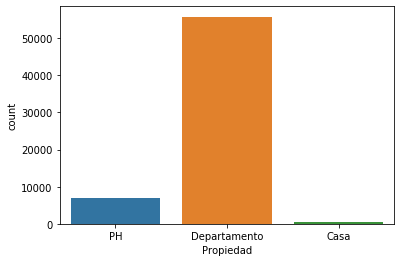

In [196]:
sns.countplot(x = 'Propiedad', data = errores)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]),
 <a list of 57 Text xticklabel objects>)

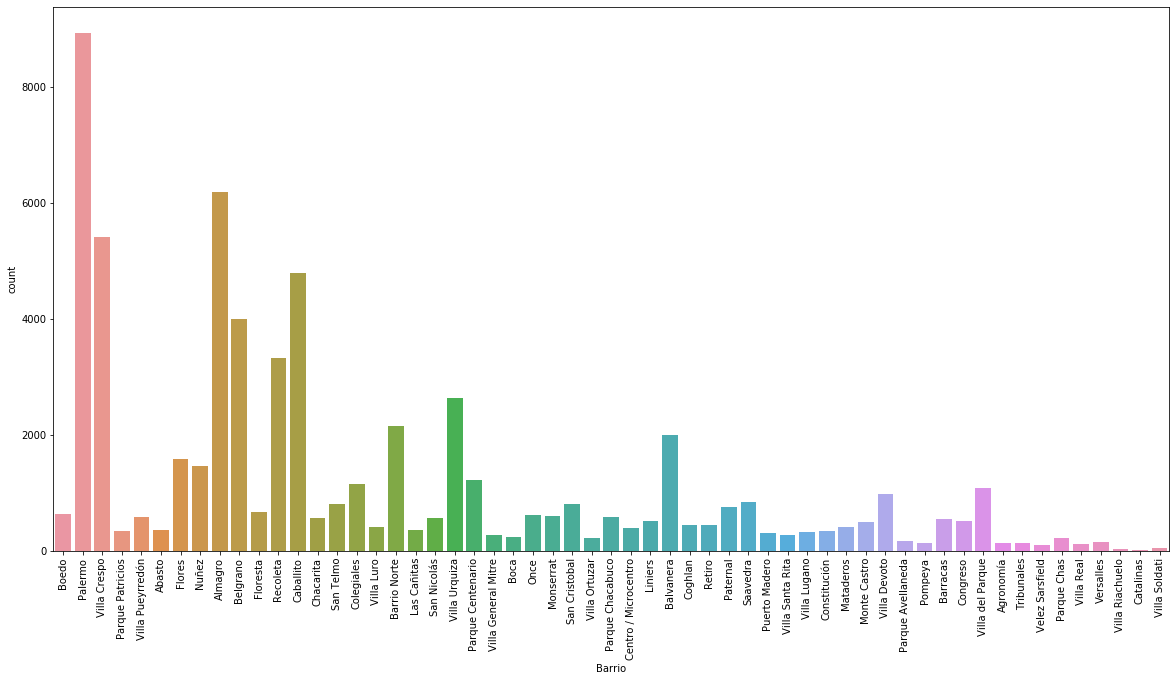

In [197]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'Barrio', data = errores)
plt.xticks(rotation = 90)

In [198]:
errores = errores.dropna()
errores

,Errores,Propiedad,Barrio
3,76384.203125,PH,Palermo
5,9996.312500,PH,Villa Crespo
7,53.687500,PH,Villa Crespo
10,-23.000000,PH,Villa Pueyrredón
20,1005.750000,Departamento,Abasto
...,...,...,...
146534,3540.250000,Departamento,Palermo
146537,5021.062500,Departamento,Palermo
146540,-50798.375000,Departamento,Palermo
146544,64742.406250,Departamento,Palermo


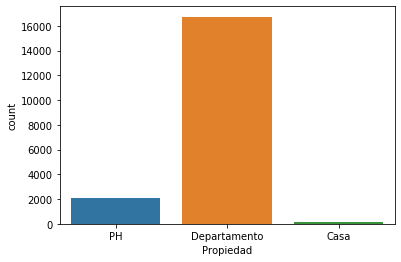

In [199]:
sns.countplot(x = 'Propiedad', data = errores)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]),
 <a list of 57 Text xticklabel objects>)

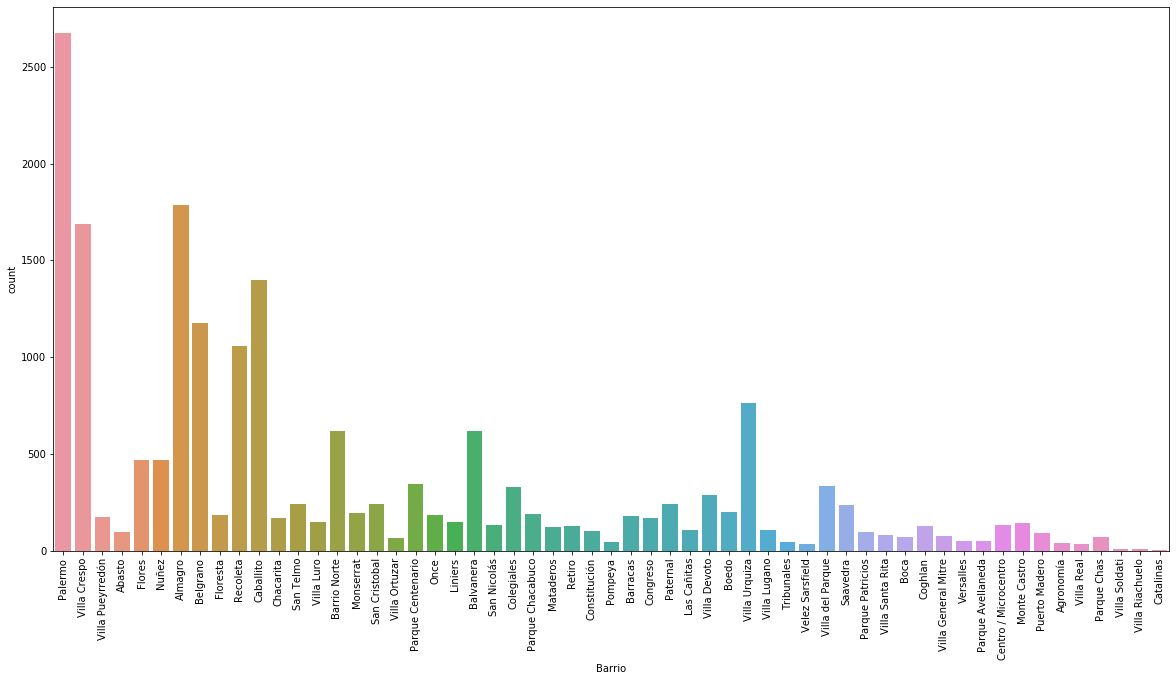

In [200]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'Barrio', data = errores)
plt.xticks(rotation = 90)

Analizando los errores predichos por XGBoost a nivel de los tipos de propiedad o de los barrios, podemos llegar a inferir a partir de los gráficos que la mayor cantidad de errores se dan en los tipos de propiedad o barrios que tienen mayor cantidad de instancias, lo que me lleva a inducir que no hay en estas dos variables algo que explique los errores del modelo.

### Conclusiones - Errores - Puntos a mejorar

A partir de lo observado en los gráficos planteados arriba, podemos ver que mientras para el modelo de RandomForest las variables más relevantes fueron principalmente *surface_total* y *surface_covered* y en menor medida *lat* , *lon* y *bathrooms*.
Mientras que para el modelo de XGBoost las variables más relevantes fueron *bathrooms* y *surface_total* y en menor medida *rooms* y *surface_covered*

Las variables más importantes para RandomForest fueron las esperadas, de acuerdo a lo trabajado en modelos más simples y en el Proyecto 1. Pensar que la superficie y la ubicación de un inmueble determinan su precio es de esperar.

Por otro lado, para XGBoost los resultados fueron un poco sorpresivos. La importancia de *bathrooms* la asocio a que inmuebles con una gran cantidad de baños necesariamente tienen una gran cantidad de m2, lo cual suena lógico. Pero que la importancia de que las variables que determinan la ubicación del inmueble sea tan baja llama la atención, no solo por ser variables que presentaron una marcada importancia a lo largo del Proyecto 1 y el trabajo realizado en este proyecto también, sino porque llevado a la realidad la ubicación tiene gran implicancia en el precio de un inmueble.

Si bien los modelos planteados en este proyecto logran una mejora en el desempeño con respecto a los modelos del Proyecto 1, hay algunos aspectos a mejorar.

Por un lado, considero que todavía hay espacio para mejorar aún más en el AED, puntualmente en la *eliminación de outliers* y en *imputación de valores faltantes*, donde creo que una imputación de valores faltantes en *lat y lon* en lugar de elminiación podría resultar en un mejor desempeño para el modelo de RandomForest.

Otro punto que podría lograr mejores resultados es el uso de `GridSearch` en lugar de `RandomSearch`, aunque a un costo computacional más elevado.

Otros aspecto a resaltar es que el RandomSearch utilizado en el modelo de XGBoost, genera un costo computacional elevado que no genera mejora alguna en el desempeño del modelo. Optimizar menos o distintos hiperparámetros podría generar mejores resultados o con un costo menor.

Cabe mencionar que si bien ha habido una mejora en test desde los modelos más básicos, e incluso de RandomForest a XGBoost, un aspecto que todavía tiene espacio para mejoras es el overfitting obtenido con los modelos planteados.